In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

## Load Data

In [2]:
# Load the iris dataset
iris = load_iris()
feature_names = iris.feature_names 
features = iris.data
labels = iris.target
classes = iris.target_names

## Functions for displaying data

In [3]:
def plot_hard_clustering(clusters, title):
    n_features = features.shape[1]
    fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20))

    for i, ax in enumerate(axes.flat):
        if i < (n_features)**2:
            x = i // (n_features)
            y = i % (n_features)
            if x == y:
                ax.hist(features[:, x], bins=20, color='gray')
                ax.set_xlabel(feature_names[x])
                ax.set_ylabel('Count')
            else:
                scatter = ax.scatter(features[:, x], features[:, y], 
                                    c=clusters, cmap='Set2', s=50, edgecolors='k')
                ax.set_xlabel(feature_names[x])
                ax.set_ylabel(feature_names[y])
        else:
            fig.delaxes(ax)

    fig.suptitle(title)
    fig.tight_layout()


def plot_soft_clustering(cluster_membership, title, legend=[]):
    # Function to create transparent colors
    def t_col(color, percent=50, name=None):
        rgb = plt.cm.colors.to_rgb(color)
        return plt.cm.colors.to_rgba(rgb, alpha=(100 - percent) / 100)

    # Create transparent colors based on membership degrees
    max_cl = np.argmax(cluster_membership, axis=1)
    cl_degree = np.max(cluster_membership, axis=1)
    cmap = plt.cm.get_cmap('Set2')
    transparent_color = [t_col(cmap(max_cl[j]), percent=100-cl_degree[j]*100) 
                        for j in range(len(max_cl))]

    # Plotting for Fuzzy C-means with matplotlib
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    for i, ax in enumerate(axes.flat):
        if i < 16:  # We only need 16 subplots
            x = i // 4
            y = i % 4
            if x != y:
                ax.scatter(features[:, x], features[:, y], c=transparent_color, s=50, edgecolors='k')
                ax.set_xlabel(feature_names[x])
                ax.set_ylabel(feature_names[y])
            else:
                ax.hist(features[:, x], bins=20, color='gray')
                ax.set_xlabel(feature_names[x])
                ax.set_ylabel('Count')
        else:
            fig.delaxes(ax)

    # Add a legend in latex
    if len(legend) > 0:
        fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=legend[i], 
                                    markerfacecolor=cmap(i), markersize=10) for i in range(len(legend))],
                loc='lower center', ncol=len(legend), fontsize='large', title='metacluster', bbox_to_anchor=(0.5, 0))
        

    plt.suptitle(title, y=0.995, fontsize=16)
    plt.tight_layout()

    if len(legend) > 0:
        plt.subplots_adjust(bottom=0.06)
    plt.show()

## K-Means Clustering

In [4]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=20, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

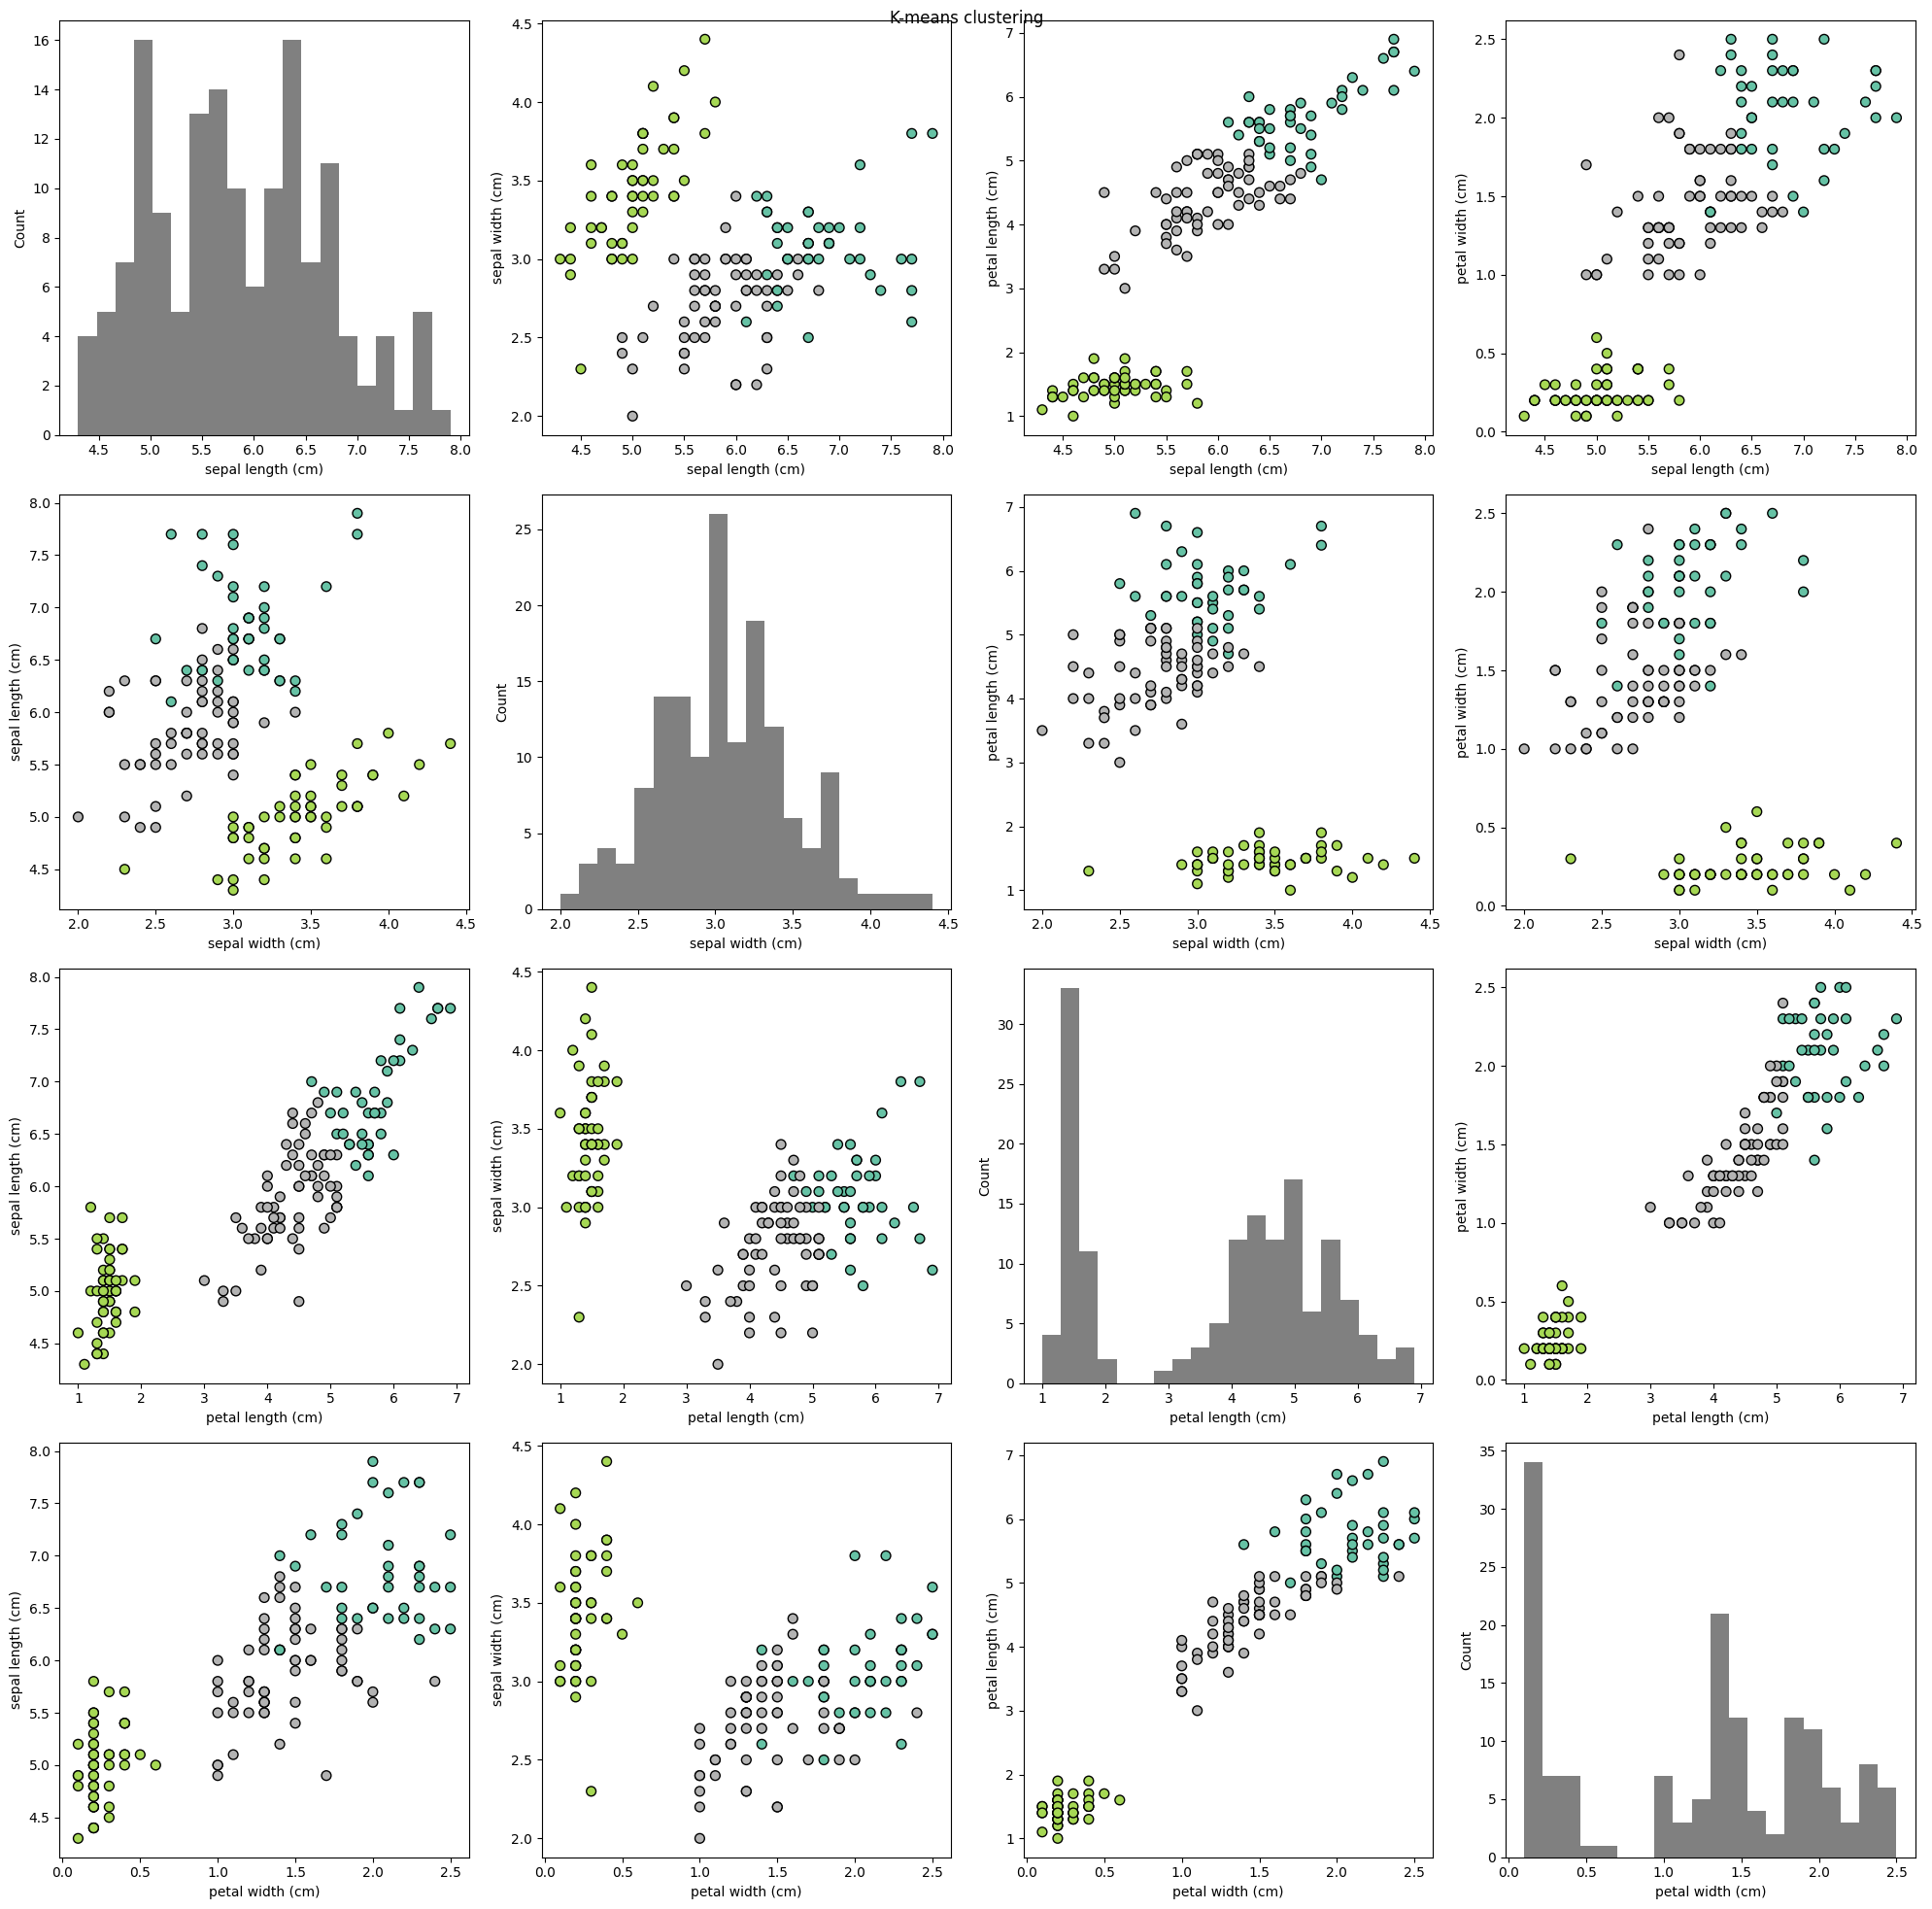

In [5]:
plot_hard_clustering(kmeans_labels, 'K-means clustering')

In [6]:
# Silhouette score
silhouette_avg = silhouette_score(features, kmeans_labels)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.5511916046195919


## Fuzzy C-Means Clustering

In [7]:
# Fuzzy C-means clustering
from fcmeans import FCM
fcm = FCM(n_clusters=3)
fcm.fit(features)
fcm_labels = fcm.predict(features)
fcm_centers = fcm.centers
fcm_membership = fcm.u

/var/folders/qn/sypqqw3101v1k6_70wqyd99h0000gn/T/ipykernel_23427/1810603944.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set2')


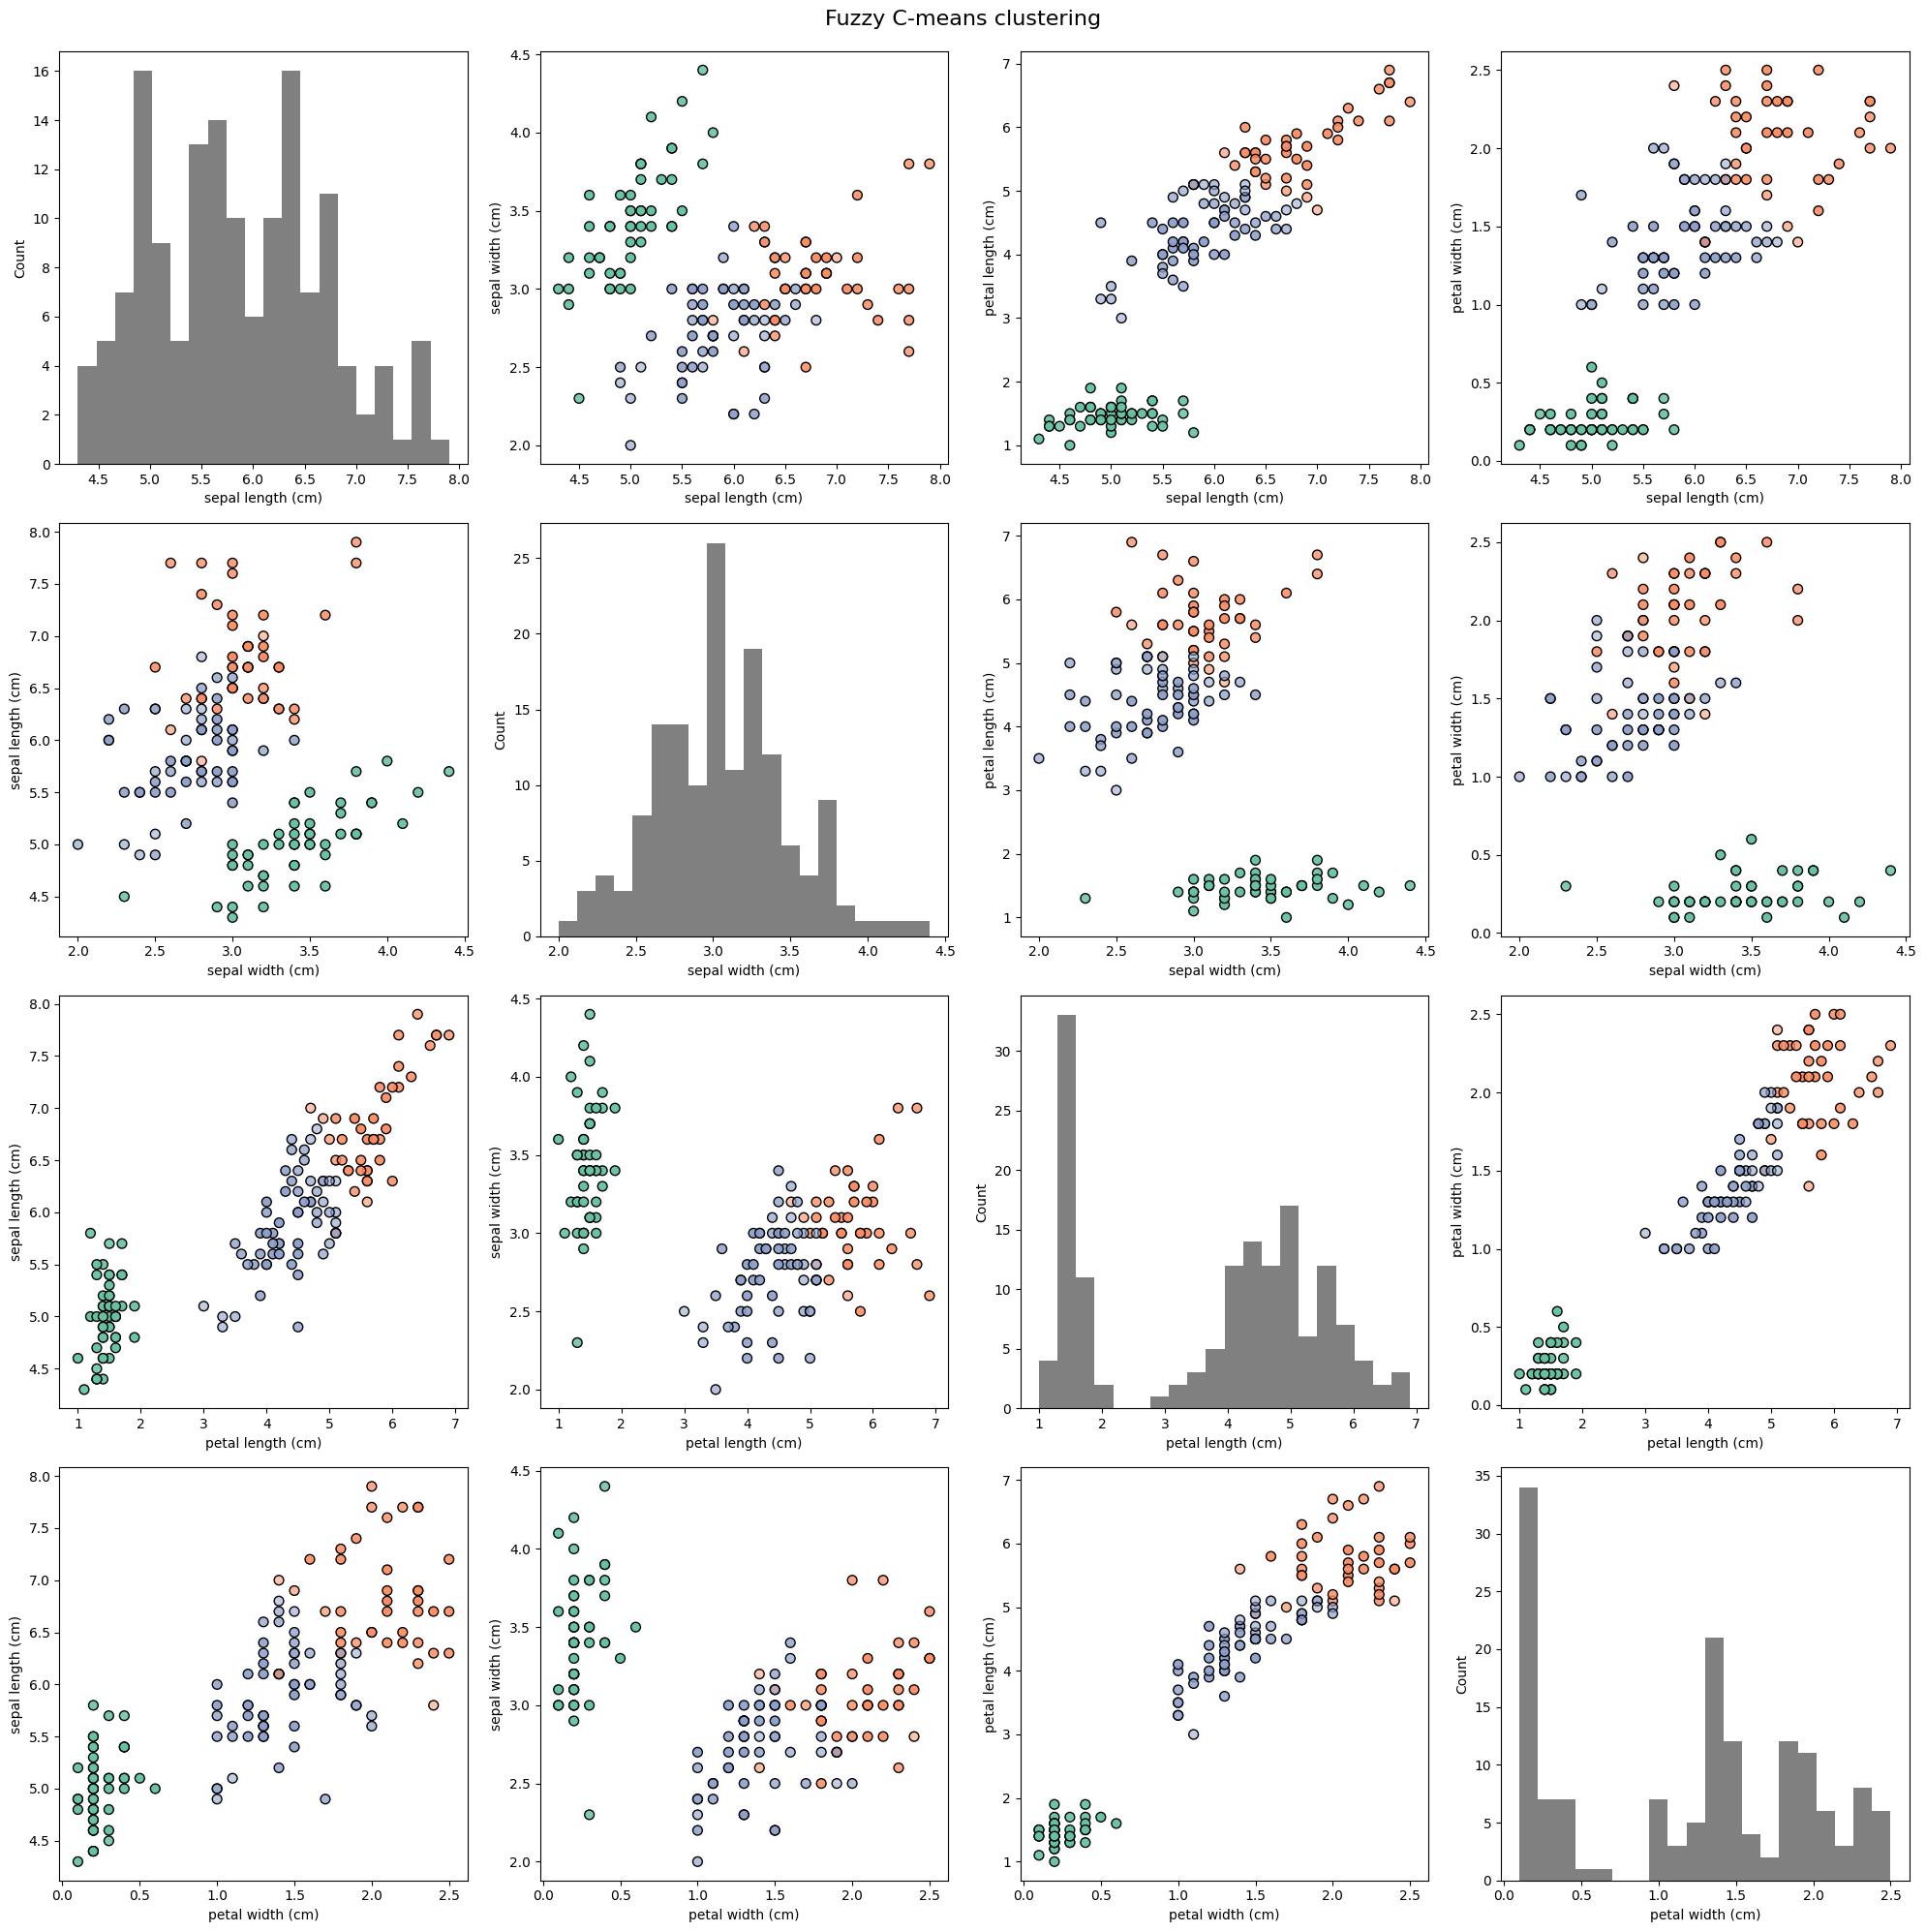

In [8]:
plot_soft_clustering(fcm_membership, 'Fuzzy C-means clustering')

## Evidential C-Means Clustering

In [9]:
from evclust.ecm import ecm
model = ecm(x=features, c=3,beta = 1.1,  alpha=0.1, delta=9)

[1, 61.32274908269299]
[2, 58.84969907522115]
[3, 57.86234645854985]
[4, 57.30997733686138]
[5, 57.086149276571554]
[6, 57.0328050634657]
[7, 57.022427022802866]
[8, 57.01964862410177]
[9, 57.01866088320607]


/Users/victor/Documents/GitHub/clustering-examples/.venv/lib/python3.9/site-packages/evclust/ecm.py:163: RuntimeWarning: invalid value encountered in power
  J = np.nansum((m ** beta) * D[:, :f - 1] * np.tile(card[:f - 1] ** alpha, (n, 1))) + delta2 * np.nansum(mvide[:f - 1] ** beta)


/var/folders/qn/sypqqw3101v1k6_70wqyd99h0000gn/T/ipykernel_23427/1810603944.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set2')


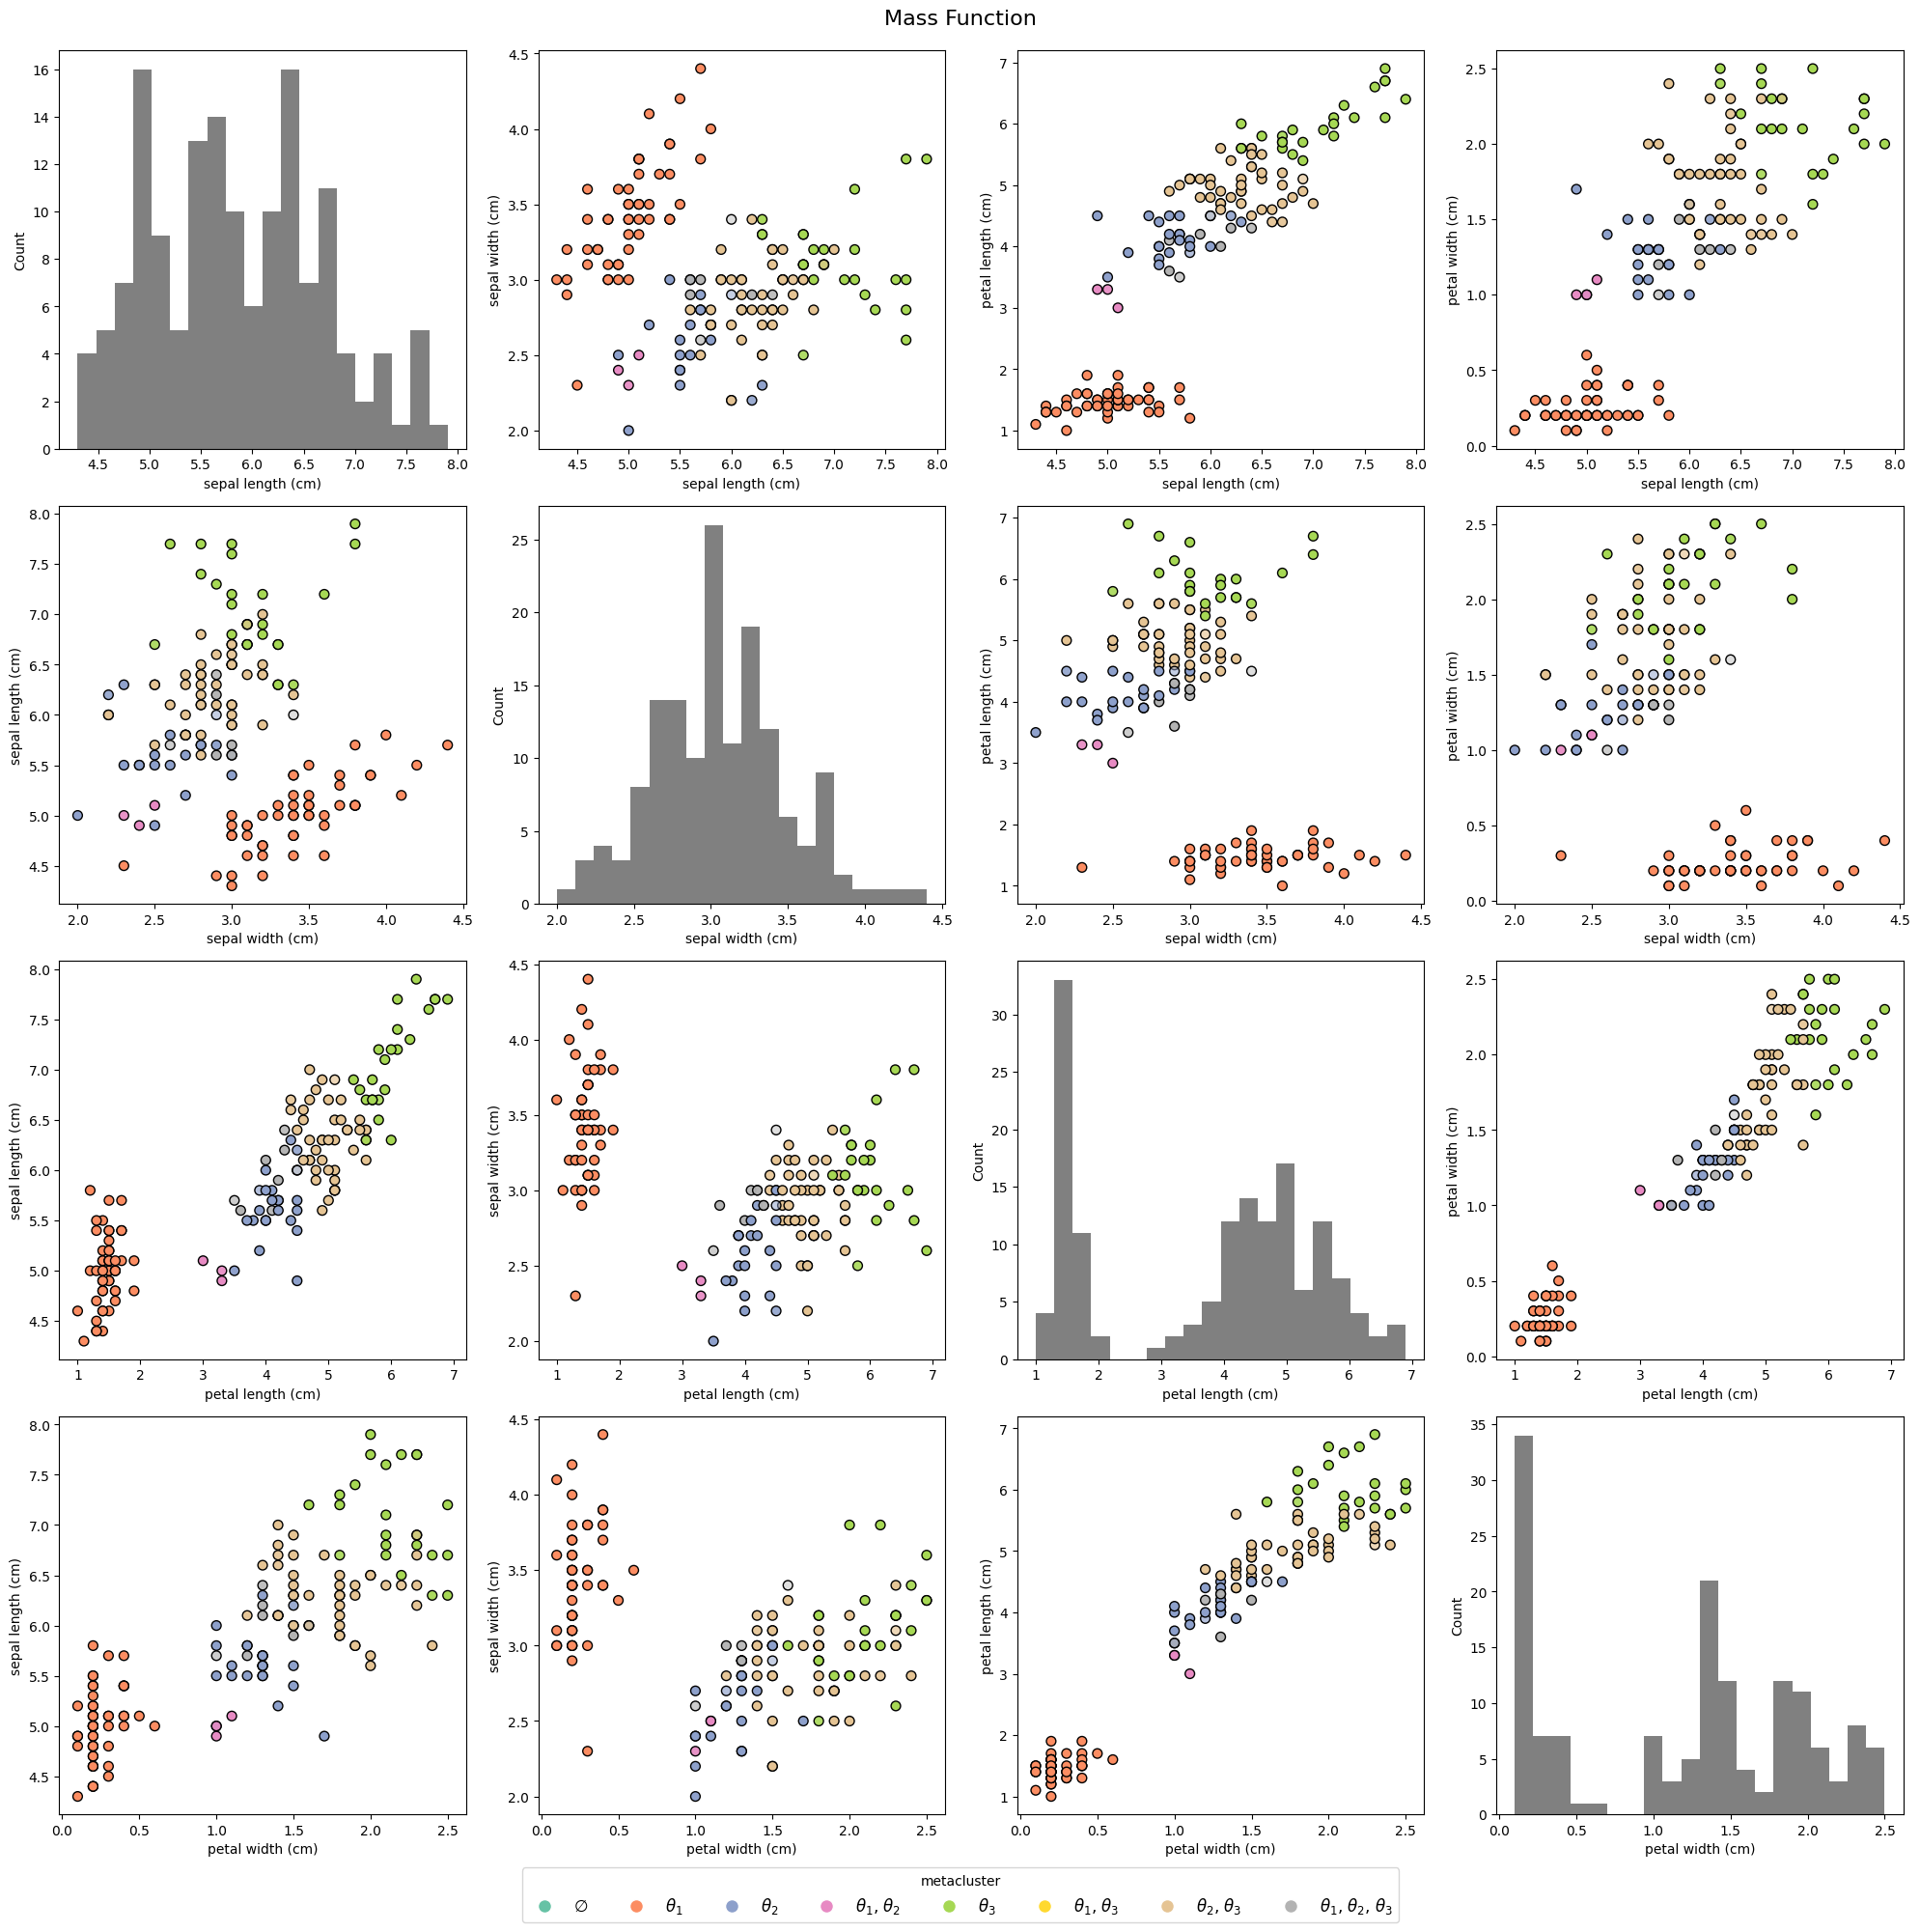

In [13]:
focal_sets = model['F']
focal_sets = [", ".join(["$\\theta_{" + str(i+1) + "}$" for i in range(len(f)) if f[i] == 1]) for f in focal_sets]
focal_sets[0] = "$\emptyset$"
focal_sets

mass = model['mass']
plot_soft_clustering(mass, 'Mass Function', legend=focal_sets)

/var/folders/qn/sypqqw3101v1k6_70wqyd99h0000gn/T/ipykernel_23427/1810603944.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set2')


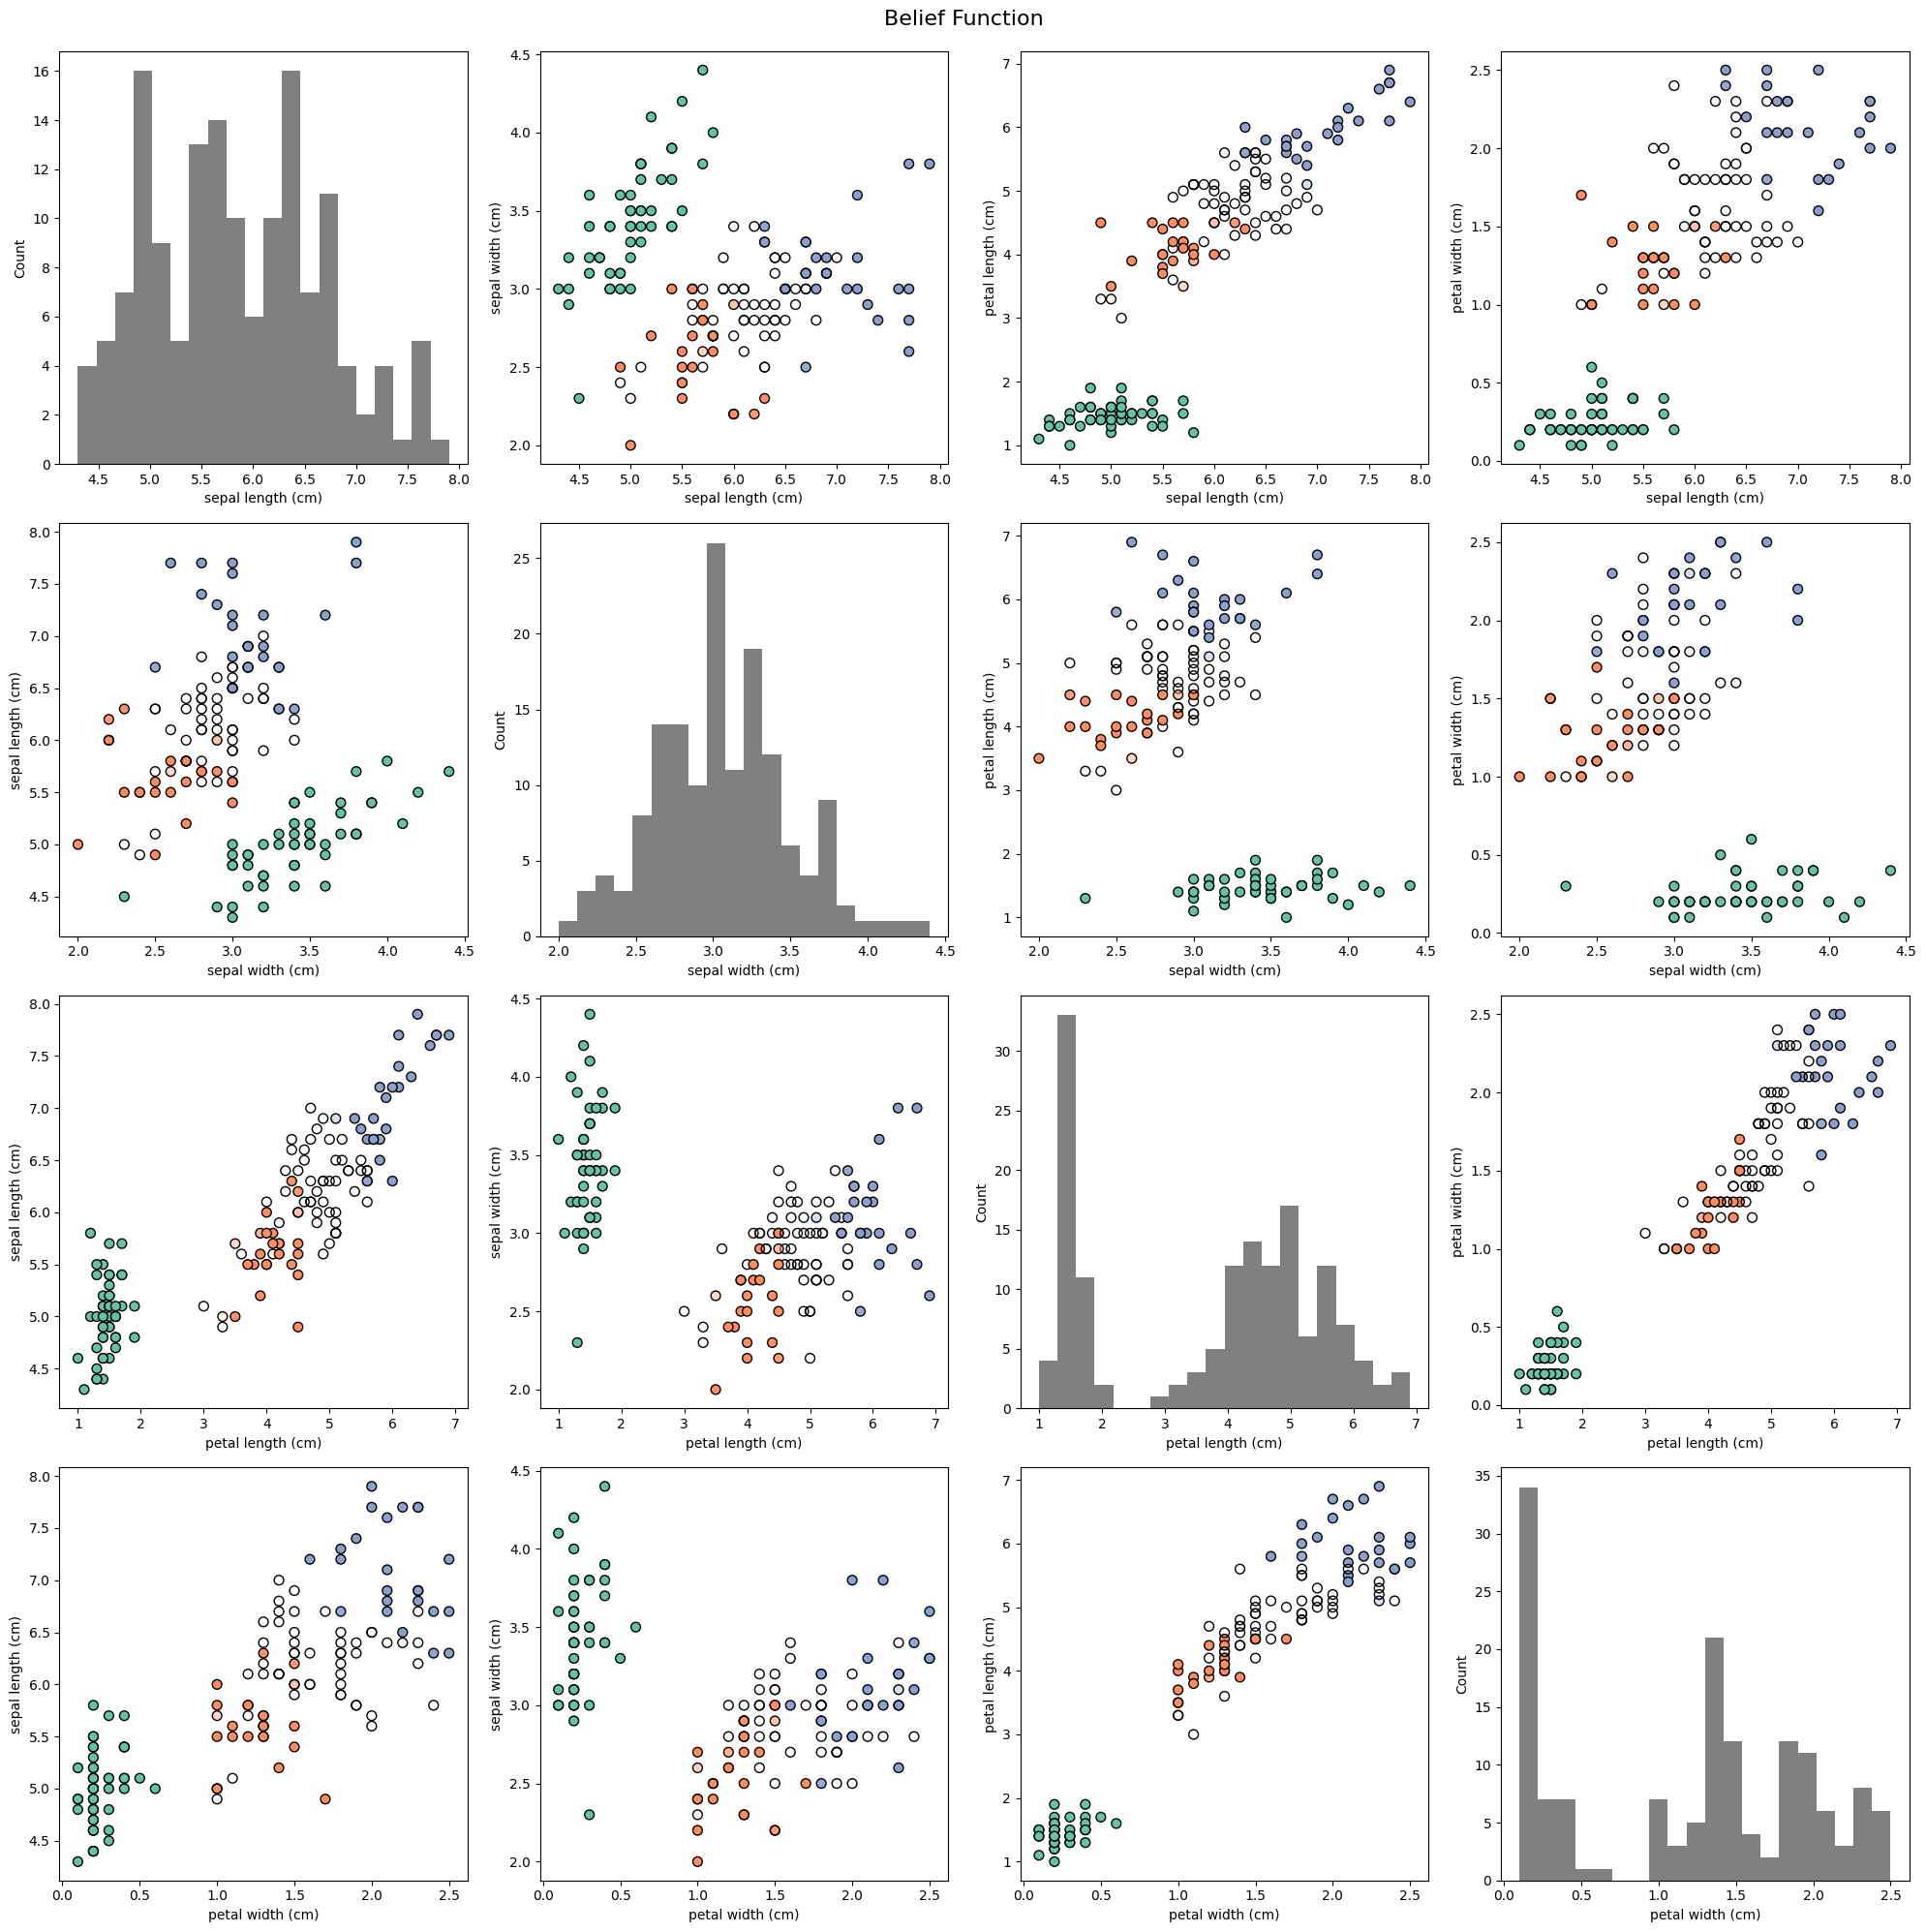

In [14]:
bel = model['bel']
plot_soft_clustering(bel, 'Belief Function')

In [12]:
pl = model['pl']